# **DESAFIO 2:** Visualizaciones en Python

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns

## DATASET: COVID 19 Progreso mundial de vacunación
Este conjunto de datos brinda la oportunidad de hacer preguntas como:
* ¿Qué vacuna utiliza cada país?
* ¿En qué país el programa de vacunación está más avanzado?
* ¿Dónde se vacunan más personas por día?

In [2]:
# Importación de dataset
data = pd.read_csv('../datasets/covid_vaccinations/country_vaccinations.csv')
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86512 entries, 0 to 86511
Data columns (total 15 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   country                              86512 non-null  object 
 1   iso_code                             86512 non-null  object 
 2   date                                 86512 non-null  object 
 3   total_vaccinations                   43607 non-null  float64
 4   people_vaccinated                    41294 non-null  float64
 5   people_fully_vaccinated              38802 non-null  float64
 6   daily_vaccinations_raw               35362 non-null  float64
 7   daily_vaccinations                   86213 non-null  float64
 8   total_vaccinations_per_hundred       43607 non-null  float64
 9   people_vaccinated_per_hundred        41294 non-null  float64
 10  people_fully_vaccinated_per_hundred  38802 non-null  float64
 11  daily_vaccinations_per_milli

## GRAFICOS

Variables utilizadas:
* country
* date
* vaccines
* total_vaccinations
* people_vaccinated

### MATPLOTLIB

In [4]:
mpl.style.use('ggplot')

#### Top 10 de paises con mayor cantidad de personas vacunadas

In [5]:
data.people_vaccinated.isnull()

0        False
1         True
2         True
3         True
4         True
         ...  
86507    False
86508    False
86509    False
86510    False
86511    False
Name: people_vaccinated, Length: 86512, dtype: bool

In [6]:
# Total de personas vacunadas agrupado por país
countries = data.groupby('country').sum()
countries.people_vaccinated

country
Afghanistan           98211047.0
Albania              149987489.0
Algeria              136020513.0
Andorra                1255700.0
Angola               249887443.0
                        ...     
Wales                886535676.0
Wallis and Futuna       191870.0
Yemen                  8551760.0
Zambia                30955954.0
Zimbabwe             914215909.0
Name: people_vaccinated, Length: 223, dtype: float64

In [7]:
# Orden de cantidad de personas vacunadas
countries_sort = countries.sort_values('people_vaccinated', ascending=False)
countries_sort.people_vaccinated.head(10)

country
India             2.058197e+11
United States     8.002542e+10
Brazil            4.344773e+10
Indonesia         3.492632e+10
China             2.160637e+10
Germany           1.885180e+10
United Kingdom    1.823835e+10
Mexico            1.648647e+10
Turkey            1.607628e+10
France            1.584358e+10
Name: people_vaccinated, dtype: float64

(9.0, 0.0)

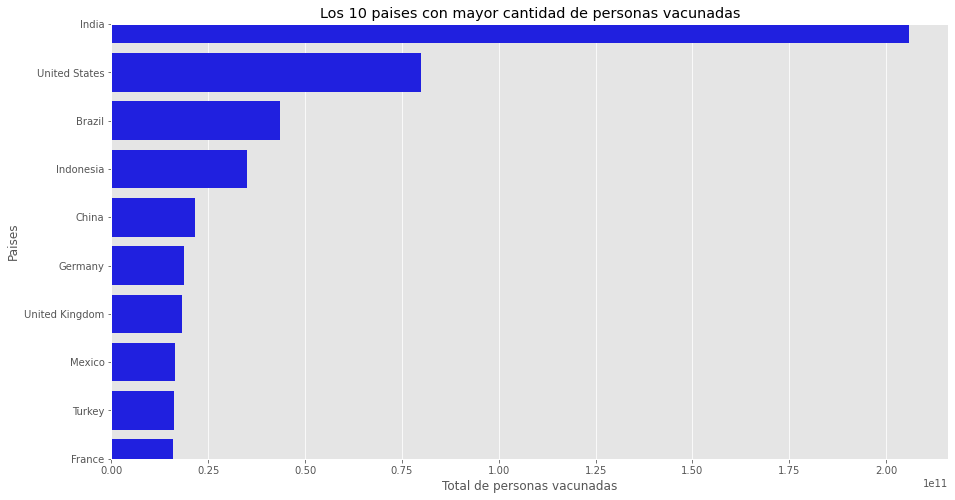

In [8]:
# Gráfico del total de personas vacunadas x país
fix, ax = plt.subplots(figsize=(15, 8))
ax = sns.barplot(data=countries_sort, x='people_vaccinated', y=countries_sort.index, color='b')
ax.set_xlabel('Total de personas vacunadas')
ax.set_ylabel('Paises')
ax.set_title('Los 10 paises con mayor cantidad de personas vacunadas')
ax.set_ylim(9, 0)

#### Gráfico del total de vacunaciones en Argentina por año

In [9]:
# Agrega columna año
data['date'] = pd.to_datetime(data.date)
data['year'] = data.date.dt.year
data.head()

,country,iso_code,date,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,vaccines,source_name,source_website,year
0,Afghanistan,AFG,2021-02-22,0.0,0.0,NaN,NaN,NaN,0.0,0.0,NaN,NaN,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
1,Afghanistan,AFG,2021-02-23,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
2,Afghanistan,AFG,2021-02-24,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
3,Afghanistan,AFG,2021-02-25,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021
4,Afghanistan,AFG,2021-02-26,NaN,NaN,NaN,NaN,1367.0,NaN,NaN,NaN,34.0,"Johnson&Johnson, Oxford/AstraZeneca, Pfizer/Bi...",World Health Organization,https://covid19.who.int/,2021


In [10]:
# Agrupo por año
country_anios = data.groupby(['year', 'country'], as_index=False).sum()

# Extraigo los datos de Argentina
argentina = country_anios.groupby('country').get_group('Argentina')
argentina

,year,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
0,2020,Argentina,1.044700e+05,1.044450e+05,2.500000e+01,22907.0,31556.0,0.23,0.23,0.00,692.0
47,2021,Argentina,1.073968e+10,6.626909e+09,3.966627e+09,78047153.0,77107358.0,23548.85,14530.94,8697.63,1690728.0
270,2022,Argentina,7.939165e+09,3.545646e+09,3.142906e+09,18414119.0,19257776.0,17408.25,7774.56,6891.41,422267.0


In [11]:
# poner año como indice
argentina.index = argentina.year
argentina = argentina.drop('year', axis='columns')
argentina

,country,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million
year,,,,,,,,,,
2020,Argentina,1.044700e+05,1.044450e+05,2.500000e+01,22907.0,31556.0,0.23,0.23,0.00,692.0
2021,Argentina,1.073968e+10,6.626909e+09,3.966627e+09,78047153.0,77107358.0,23548.85,14530.94,8697.63,1690728.0
2022,Argentina,7.939165e+09,3.545646e+09,3.142906e+09,18414119.0,19257776.0,17408.25,7774.56,6891.41,422267.0


Text(0.5, 1.0, 'Total de vacunaciones en Argentina')

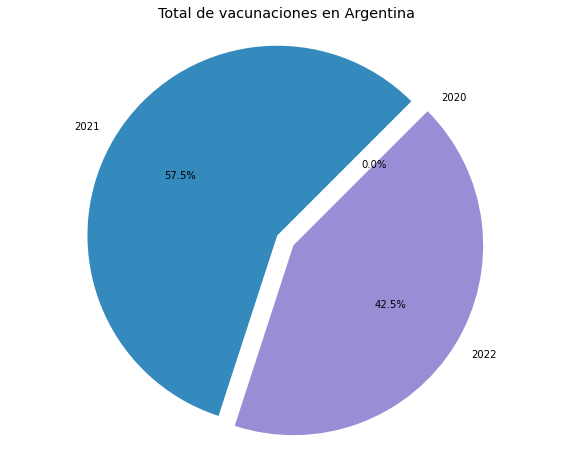

In [12]:
fig, ax = plt.subplots(figsize=(10, 8))
ax.pie(argentina.total_vaccinations, explode=(0, 0.1, 0), labels=argentina.index, autopct='%1.1f%%', startangle=45)
ax.axis('equal')
ax.set_title('Total de vacunaciones en Argentina')

#### Gráfica de Serie de tiempo entre personas vacunadas y personas completamente vacunadas

In [13]:
# Agrupar por fecha
dates = data.groupby('date').mean()
dates.tail()

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year
date,,,,,,,,,,
2022-03-25,8.982927e+07,2.909494e+07,2.503743e+07,131396.227273,106284.443548,153.849898,65.823053,59.477010,1286.072581,2022.0
2022-03-26,1.220260e+08,4.030670e+07,3.424653e+07,151079.984848,140955.907216,162.384583,68.556087,61.947746,1342.546392,2022.0
2022-03-27,1.324064e+08,4.396081e+07,3.685554e+07,124950.254237,154651.719101,162.228986,68.272388,61.931143,1379.202247,2022.0
2022-03-28,1.301745e+08,4.213641e+07,3.480738e+07,275386.481481,177605.456790,158.476087,69.261719,61.938235,1444.234568,2022.0
2022-03-29,1.604524e+08,4.924477e+07,4.121386e+07,394830.275000,281356.923077,153.989615,67.197500,59.874615,1746.173077,2022.0


In [14]:
people_vaccinated_max = dates.people_vaccinated.max()
people_fully_vaccinated_max = dates.people_fully_vaccinated.max()

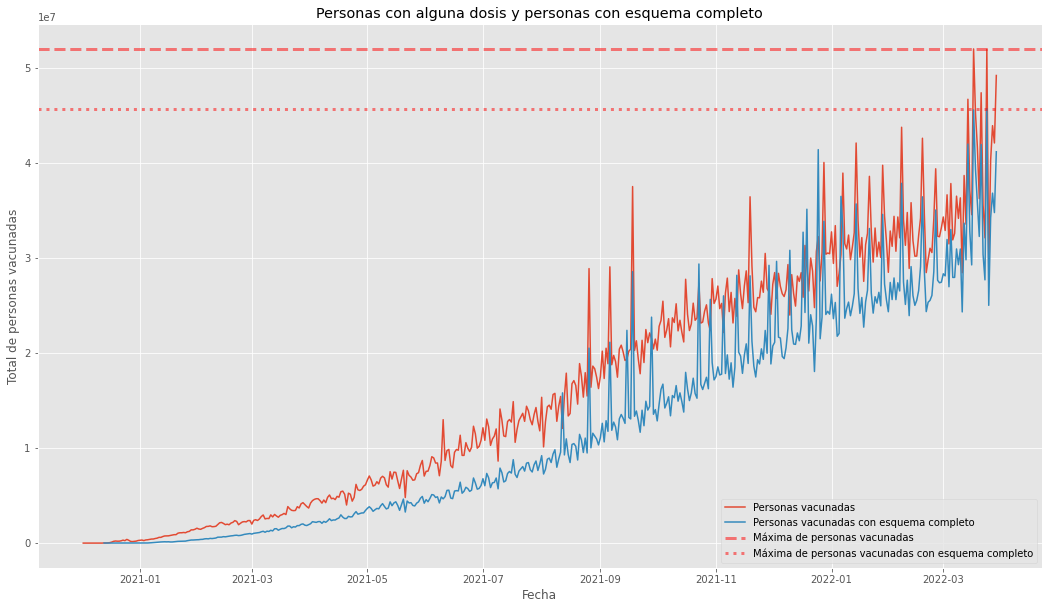

In [15]:
fig, ax = plt.subplots(figsize=(18, 10))
ax.plot(dates.index, dates.people_vaccinated, label='Personas vacunadas')
ax.plot(dates.index, dates.people_fully_vaccinated, label='Personas vacunadas con esquema completo')

ax.axhline(people_vaccinated_max, color='red', linestyle='--', alpha=0.5,    linewidth=3, label='Máxima de personas vacunadas')
ax.axhline(people_fully_vaccinated_max, color='red', linestyle=':', alpha=0.5, linewidth=3, label='Máxima de personas vacunadas con esquema completo')

ax.set_xlabel('Fecha')  
ax.set_ylabel('Total de personas vacunadas') 
ax.set_title('Personas con alguna dosis y personas con esquema completo')
ax.legend()


## Probando geopandas: Gráfico de personas vacunadas con esquema completo (x 100)

In [16]:
countries_gdf = gpd.read_file('./ne_10m_admin_0_countries/ne_10m_admin_0_countries.shp')
countries_gdf.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,0,2,Indonesia,IDN,0,2,Sovereign country,1,Indonesia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.70361 4..."
1,Admin-0 country,0,3,Malaysia,MYS,0,2,Sovereign country,1,Malaysia,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((117.70361 4.16341, 117.69711 4..."
2,Admin-0 country,0,2,Chile,CHL,0,2,Sovereign country,1,Chile,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.50611..."
3,Admin-0 country,0,3,Bolivia,BOL,0,2,Sovereign country,1,Bolivia,...,None,None,None,None,None,None,None,None,None,"POLYGON ((-69.51009 -17.50659, -69.51009 -17.5..."
4,Admin-0 country,0,2,Peru,PER,0,2,Sovereign country,1,Peru,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-69.51009 -17.50659, -69.63832..."


In [17]:
len(countries), len(countries_gdf)

(223, 258)

In [18]:
# Total de personas vacunadas agrupado por código de país
countries = data.groupby('iso_code').sum()
countries

,total_vaccinations,people_vaccinated,people_fully_vaccinated,daily_vaccinations_raw,daily_vaccinations,total_vaccinations_per_hundred,people_vaccinated_per_hundred,people_fully_vaccinated_per_hundred,daily_vaccinations_per_million,year
iso_code,,,,,,,,,,
ABW,3.852873e+07,2.063732e+07,1.789141e+07,110150.0,147104.0,35942.66,19252.16,16690.55,1372295.0,739774
AFG,1.180414e+08,9.821105e+07,7.771675e+07,13742.0,5741998.0,296.37,246.54,195.08,144138.0,796355
AGO,3.887402e+08,2.498874e+08,1.242011e+08,0.0,17435547.0,1145.63,736.40,366.00,513813.0,788274
AIA,8.066570e+05,4.264500e+05,3.080950e+05,1421.0,23128.0,5333.28,2819.54,2037.00,1529088.0,838799
ALB,2.955405e+08,1.499875e+08,1.238696e+08,1417691.0,2748980.0,10287.08,5220.72,4311.65,956832.0,887302
...,...,...,...,...,...,...,...,...,...,...
WSM,5.115019e+06,3.181775e+06,1.933244e+06,0.0,296358.0,2555.66,1589.75,965.96,1480731.0,650842
YEM,1.054691e+07,8.551760e+06,3.769401e+06,0.0,794952.0,34.57,28.04,12.37,26061.0,630627
ZAF,4.133434e+09,2.676047e+09,2.073199e+09,15916961.0,33331178.0,6884.30,4456.96,3452.90,555136.0,822635


In [19]:
# merge entre df de covid_vaccinations agrupado por iso_code y shape del mundo
df = pd.merge(left=countries_gdf, right=countries, left_on="SOV_A3", right_on="iso_code")

C:\Users\alk10\AppData\Local\Temp\ipykernel_12772\248985547.py:20: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cbar = fig.colorbar(bar, cax=cax)


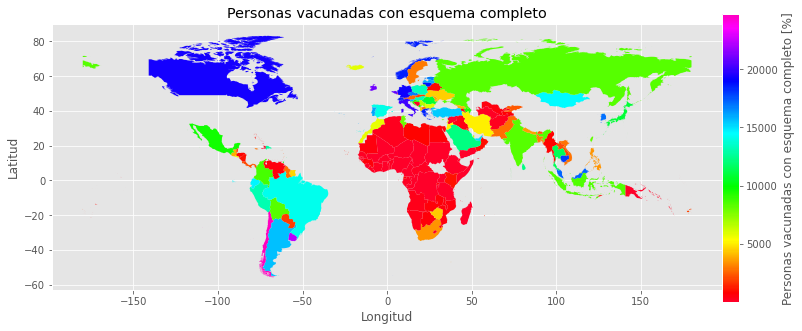

In [35]:
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111)

df.plot(ax=ax, column='people_fully_vaccinated_per_hundred', cmap='gist_rainbow')

ax.set_title('Personas vacunadas con esquema completo')
ax.set_xlabel('Longitud')
ax.set_ylabel('Latitud')

# Definición de la barra gráfica
bar = plt.cm.ScalarMappable(cmap='gist_rainbow', 
    norm=plt.Normalize(vmin = df.people_fully_vaccinated_per_hundred.min() , vmax=df.people_fully_vaccinated_per_hundred.max()))
# Se declara una lista donde se guardarán los valores de la barra
bar._A = []

# Declaración de la ubicación y el tamaño de la barra.
cax = plt.axes([0.9, 0.25, 0.02, 0.5]) # [xcoord, ycoord, ancho, largo]

# Impresión de la barra con las variables superiores (bar y cax)
cbar = fig.colorbar(bar, cax=cax)
cbar.set_label('Personas vacunadas con esquema completo [%]')